C:\Users\Aaron\AppData\Local\Temp\ipykernel_12464\3576047620.py:7: DeprecationWarning: Please use `uniform_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import uniform_filter1d


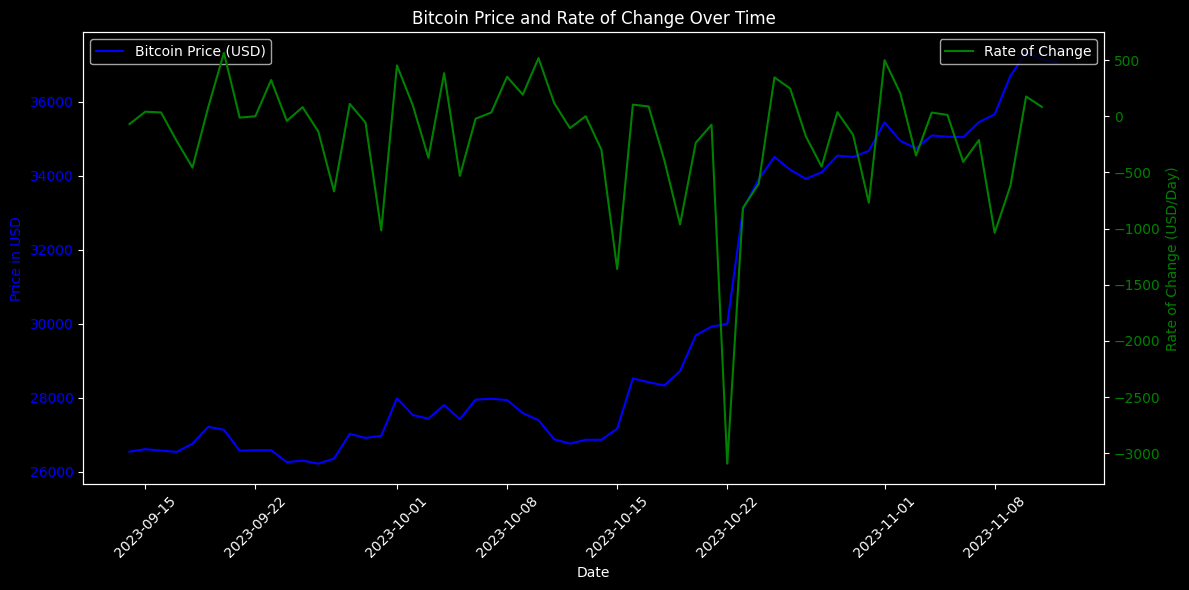

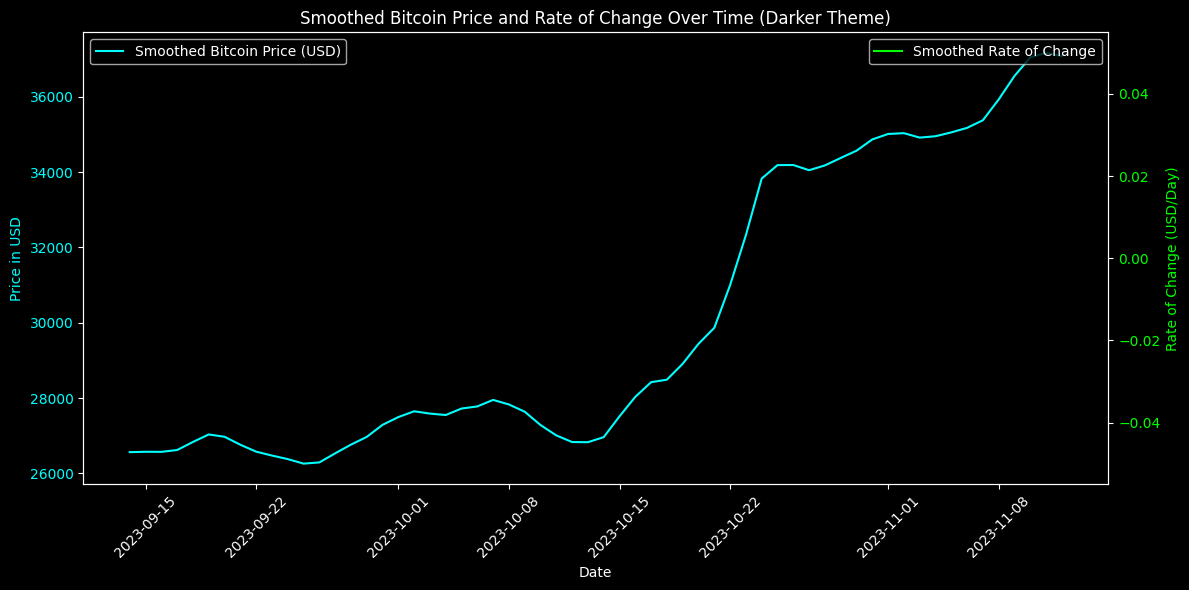

In [9]:
# Displaying the full code used for the analysis and plotting

# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.ndimage.filters import uniform_filter1d


# Load the file
file_path = 'Bitcoin_9_12_2023-11_13_2023_historical_data_coinmarketcap.csv'
bitcoin_data = pd.read_csv(file_path)

# Convert time to datetime for plotting
bitcoin_data['timeOpen'] = pd.to_datetime(bitcoin_data['timeOpen'])

# Calculating the first derivative (rate of change) of the closing price
bitcoin_data['close_diff'] = bitcoin_data['close'].diff()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Bitcoin price vs time
ax1.plot(bitcoin_data['timeOpen'], bitcoin_data['close'], label='Bitcoin Price (USD)', color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price in USD', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
ax1.legend(loc='upper left')

# Creating a twin axis for the first derivative
ax2 = ax1.twinx()
ax2.plot(bitcoin_data['timeOpen'], bitcoin_data['close_diff'], label='Rate of Change', color='g')
ax2.set_ylabel('Rate of Change (USD/Day)', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.legend(loc='upper right')

# Adding a title
plt.title('Bitcoin Price and Rate of Change Over Time')

plt.tight_layout()
plt.show()


# Setting a darker theme for the plot
plt.style.use('dark_background')

# Smoothing the data with a simple uniform filter
# The size of the filter determines the smoothing level; here, we'll use a size of 3
smoothed_close = uniform_filter1d(bitcoin_data['close'], size=3)
smoothed_close_diff = uniform_filter1d(bitcoin_data['close_diff'], size=3)

# Re-plotting with the smoothed data and darker theme
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Smoothed Bitcoin price vs time
ax1.plot(bitcoin_data['timeOpen'], smoothed_close, label='Smoothed Bitcoin Price (USD)', color='cyan')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price in USD', color='cyan')
ax1.tick_params(axis='y', labelcolor='cyan')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
ax1.legend(loc='upper left')

# Creating a twin axis for the smoothed first derivative
ax2 = ax1.twinx()
ax2.plot(bitcoin_data['timeOpen'], smoothed_close_diff, label='Smoothed Rate of Change', color='lime')
ax2.set_ylabel('Rate of Change (USD/Day)', color='lime')
ax2.tick_params(axis='y', labelcolor='lime')
ax2.legend(loc='upper right')

# Adding a title with the darker theme
plt.title('Smoothed Bitcoin Price and Rate of Change Over Time (Darker Theme)')

plt.tight_layout()
plt.show()